In [1]:
#TASK 1
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data
train = pd.read_csv('occupancy_train.txt')
test = pd.read_csv('occupancy_test.txt')

# Features: Humidity, Light, HumidityRatio
X_train = train[['Humidity', 'Light', 'HumidityRatio']]
y_train = train['Occupancy']

X_test = test[['Humidity', 'Light', 'HumidityRatio']]
y_test = test['Occupancy']

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Run KNN for K=1 to 10
accuracies = []
best_acc = 0
best_k = 0

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append((k, acc))
    if acc > best_acc:
        best_acc = acc
        best_k = k

# Print
print("Accuracies:")
for k, acc in accuracies:
    print(f"K={k}: {acc:.4f}")

print(f"Highest Accuracy: {best_acc:.4f} at K={best_k}")

Accuracies:
K=1: 0.9347
K=2: 0.9253
K=3: 0.9426
K=4: 0.9343
K=5: 0.9520
K=6: 0.9475
K=7: 0.9565
K=8: 0.9538
K=9: 0.9568
K=10: 0.9542
Highest Accuracy: 0.9568 at K=9


In [2]:
#TASK 2
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Chi-squared distance
def chi_squared_distance(a, b):
    dist = 0
    for i in range(len(a)):
        if a[i] + b[i] != 0:
            dist += (a[i] - b[i]) ** 2 / (a[i] + b[i])
    return dist

# KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [chi_squared_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common)
        return np.array(y_pred)

# Load Iris
iris = load_iris()
X = iris.data
y = iris.target

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/predict
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)

Accuracy: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

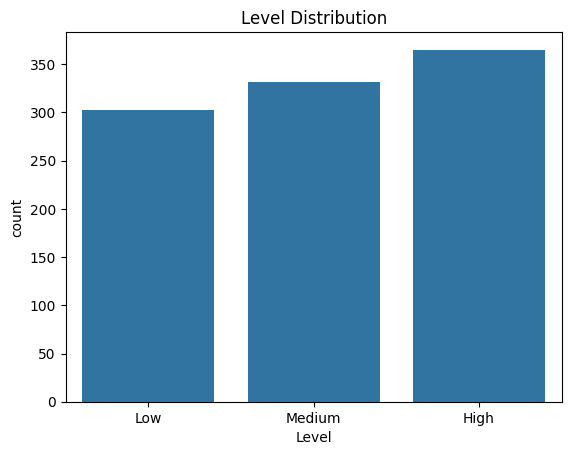

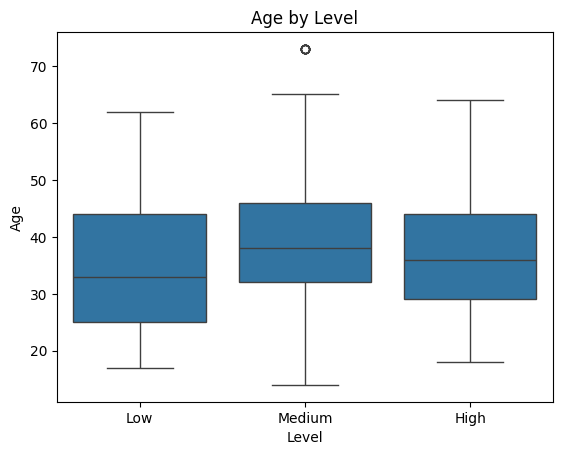

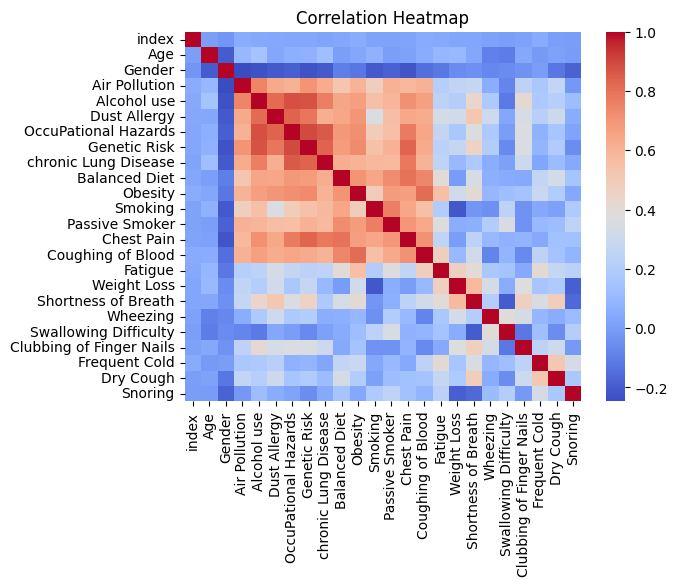

Level
High      0.365
Medium    0.332
Low       0.303
Name: proportion, dtype: float64
Missing: 0
Duplicates: 848
Correlations to Level:
 Level_num                   1.000000
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Gender                      0.164985
Age        

In [3]:
#TASK 3
#PERFORM EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cancer patient data sets.csv')

# Summary
print(df.info())
print(df.describe())

# Plots (run in notebook for visuals)
sns.countplot(x='Level', data=df)
plt.title('Level Distribution')
plt.show()

sns.boxplot(x='Level', y='Age', data=df)
plt.title('Age by Level')
plt.show()

sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Check Balance
print(df['Level'].value_counts(normalize=True))

#Handle Missing, Categorical, Duplicates
print("Missing:", df.isnull().sum().sum())  # 0

df = df.drop(columns=['index', 'Patient Id'])

print("Duplicates:", df.duplicated().sum())  # 0

#Correlation and Feature Selection
df['Level_num'] = df['Level'].map({'Low':0, 'Medium':1, 'High':2})

corr = df.corr(numeric_only=True)['Level_num'].abs().sort_values(ascending=False)

print("Correlations to Level:\n", corr)

selected = corr[corr > 0.5].index.drop('Level_num')

print("Selected Features:", list(selected))

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['Level', 'Level_num'], axis=1)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


#Split Dataset
from sklearn.model_selection import train_test_split

y = df['Level_num']

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)

#Apply KNN, Accuracies
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # Default Euclidean
knn.fit(X_train, y_train)

train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

#Different Metrics Comparison
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

results = []
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    results.append((metric, train_acc, test_acc))

df_results = pd.DataFrame(results, columns=['Metric', 'Train Acc', 'Test Acc'])
print(df_results)

#Re-Apply KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)

train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")